<h1 align="center">
    Image Segmentation    
</div>

## What is image segmentation?
- Partitioning an image into a set of meaningful segments for further analysis.

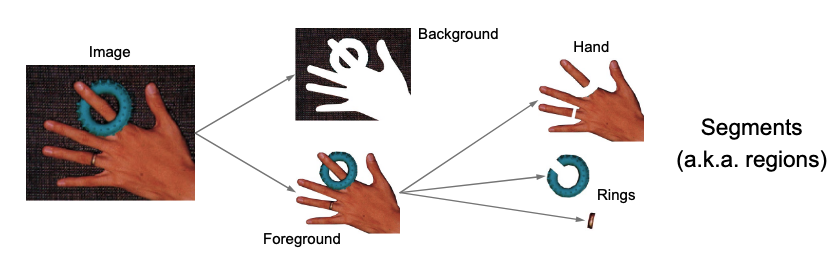

## Facilitating image segmentation
- regions should be uniform / homogeneous in some characteristics
- adjacent regions should be significantly different in these characteristics
- region interiors should be simple and without holes or missing parts
- boundaries of each region should be smooth and spatially accurate

## Terminology:
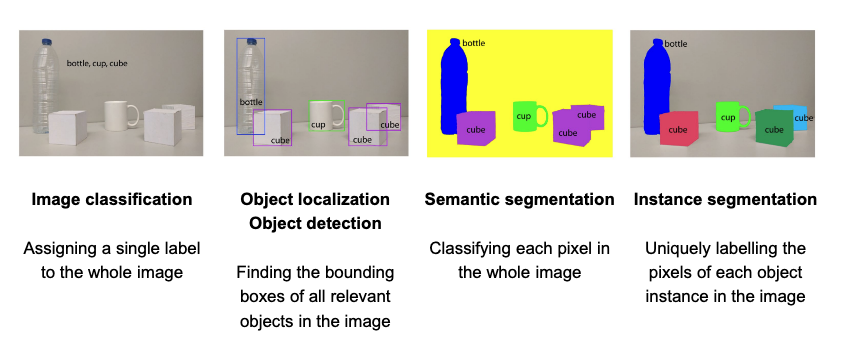

## Goal of segmentation
- Group together similar-looking pixels for further processing
- Separate images into coherent 'objects'


## Segmentation problems and challenges
- there is no single segmentation method that works well for all applications
- special domain knowledge of the application is typically essential for success
- even within a given application domain images may still vary widely

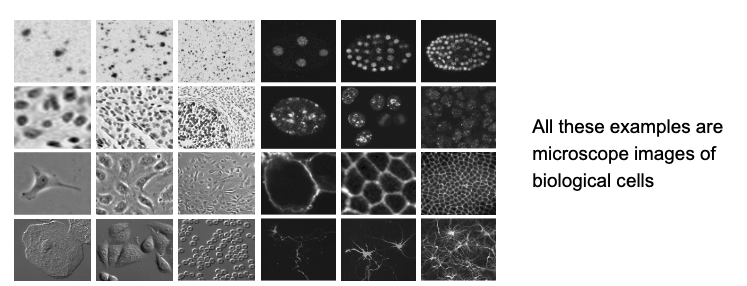

# Basic segmentation project

## Thresholding
- Effective when regions have sufficiently different intensity distributions
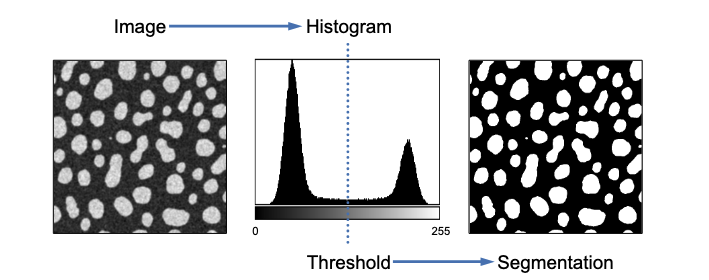
- Problematic if regions have overlapping intensity distributions
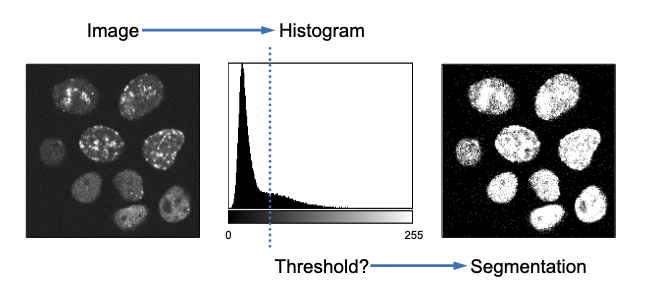

## K-means clustering
- May work if the number of clusters is known a priori
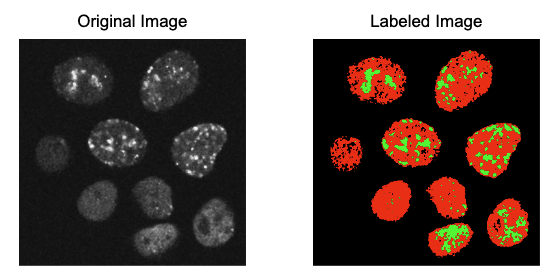
- Problematic if the number of clusters is not known a priori
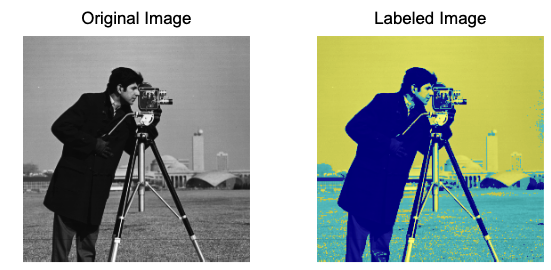
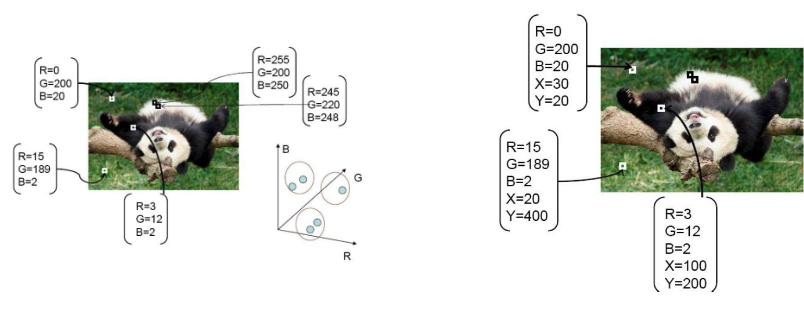

## Feature based pixel classification
- Extract path around each pixel and compute its features
- Classify each pixel based on its features using trained classifier
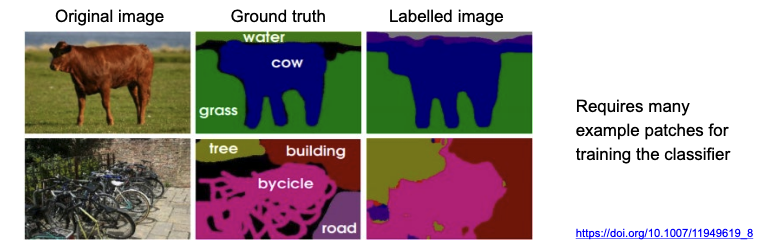

# Advanced segmentation methods

## Region splitting and merging
- Recursively split the whole image into pieces based on local statistics
- Recursively merge pieces together (in a hierarchial fashion)
- Combine splitting and merging sequentially

### Simple(st) Example
- Apply thresholding (splitting) and find regions of connected pixels (merging)
- Segment pixels individually:
$$S(x,y,\tau) = f(x) =
\begin{cases}
    1 & \text{if } Il(x,y) \geq \tau \\
    0 & \text{else}
\end{cases}
$$
How many connected components (separate objects) ae ther in this threshold image?

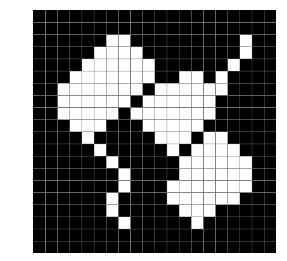

### Connectivity
**2D**:
- consider pixels in surrounding rows and columns
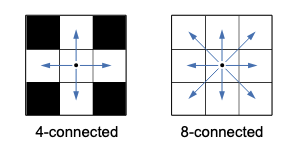

**3D**
- consider voxels in surrounding rows, columns, planes
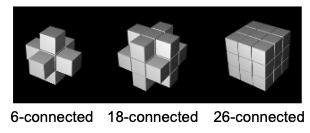

### Connected components
Number of components depends on the chosen connectivity
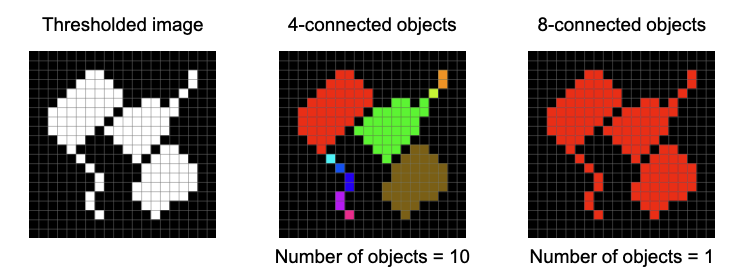

#### Connected components labelling algorithm
**First pass**:
- check eacch pixel (top-left to bottom-right)
- if an object pixel, check its neighbours $(N_4 \text{ or } N_8)$
- if no neighbours have labels, assign a new labels
- if neighbours do have labels, assign the smallest
- Record label equivalences while assigning
Equivalence sets: {1,2,6} {3,4,5}

**Second pass**
- Check each pixel (top-left to bottom-right)
- Replace each label with its smallest equivalent
- All background pixels default to zero-label

### Merging by region growing
- Define a similarity measure
- Start from one seed pixel for the region
- Add neighbouring pixels to the region if they are similar
- Repeat previous step until no more pixels are similar.
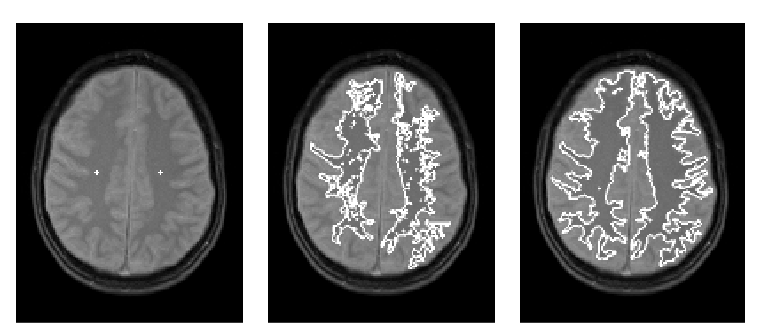

## Watershed segmentation
Based on the analogy of immersion of a topographic surface
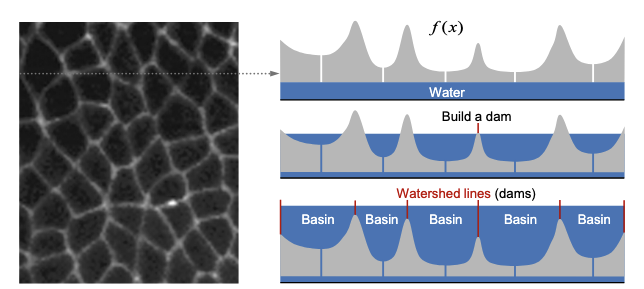

**Meyer's flooding algorithm**:
1. Choose a set of markers to start the flooding. Example: local minima. given each different labels
2. Put neighbouring pixels of each marker into priority queue. A pixel with more similar gray value has higher priority
3. Pop the pixel with the highest priority level from the queue. If the neighbours of the popped pixel that have already been laebelled all have the same label, then give the pixel that same label. Put all non-labelled neighbours that have never been in the queue into the queue
4. Repeat step 3 until queue is empty
*Resulting non-labelled pixels are the watershed lines*

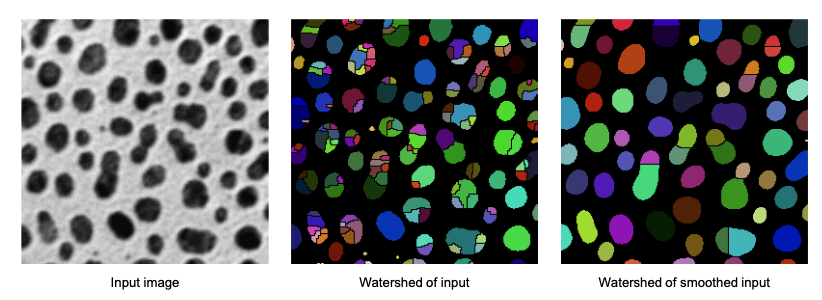

### Preprocessing for watershed segmentation
- Invert the image or compute edges if needed to get local minima markers
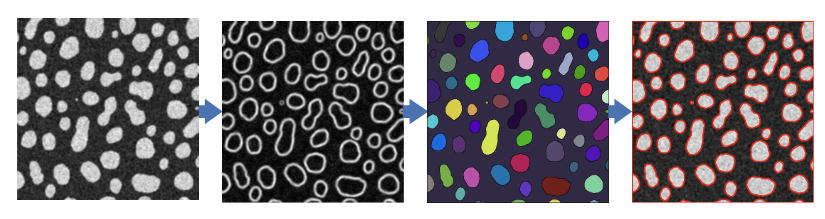

Images often have many local minima, leading to heavy oversegmentation

Preprocessing (image smoothing) may be needed to reduce false minima

Postprocessing (basin merging) may be needed to reduce fragmentation

Many different implementations and pre/postprocessing criteria exist

## Maximally stable extermal regions (MSER)
- try multiple thresholds and analyse the shape of the connected components
- select regions with virtually constant shape over many thresholds
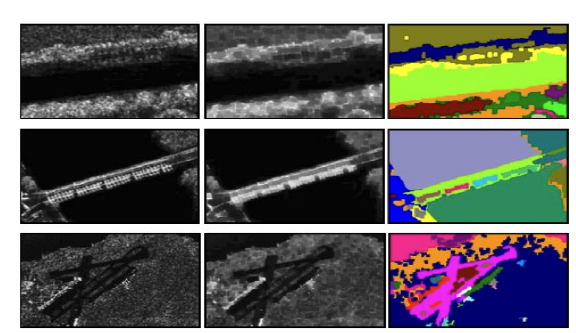

## Mean shifting

### K-means clustering vs mean shifting
K-means clustering has limitations
- need to choose K
- sensitive to outliers
- prone to local minima

Mean shifting is good alternative in many applications
- Seeks stationary points (peaks/modes) in a density function
- atteempts to find all possible cluster centers in a feature space
- does not require knowing the no. of clusters a priori
- is a variant of iterative steepest-ascent method

*Example*
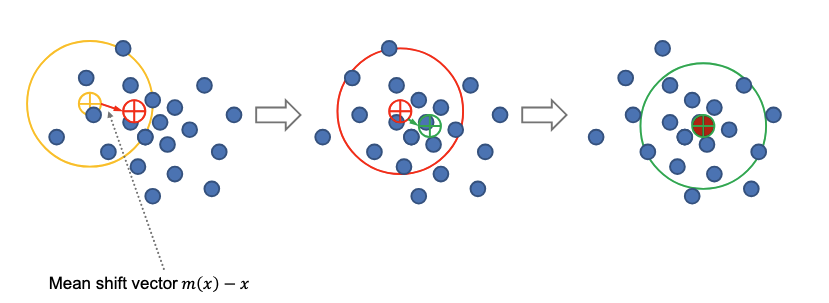

### Mean-shifting algorithm
1. Initialise random seed point $x$ and window $N$.
2. Calculate mean (center of gravity) $m(x)$ within $N$
$$
\begin{align}
m(x) &= 
\frac{\sum_{x_i \in N(x)} K(x_i-x)x_i}{\sum_{x_i \in N(x)} K(x_i-x)} \\
&\text{Mean (center of gravity)}
\end{align}
$$

$$
\begin{align}
K(x) = 
exp(-1|x|^2) \\
\text{Kernel (weight function)}
\end{align}
$$

3. Shift the search window to the mean
4. Repeat step 2 until convergence


### Mean shifting in action
Use a set of seed points to find all possible cluster centers
- initialise seeds on a regular grid
- iteratively apply mean shifting to all
- converged if seeds no longer move
- merge converged seeds if very close
- final (merged) seeds are cluster centres
- cluster cloud points accordingly

### Segmentation by mean shifting
- define features (colour, gradients, texture, et cetera)
- tranform image pixels to points in the feature space
- initialise windows at multiple seed locations in feature space
- perform mean shifting for each window until convergence
- merge windows that end up near the same location
- cluster all points according to window traversal

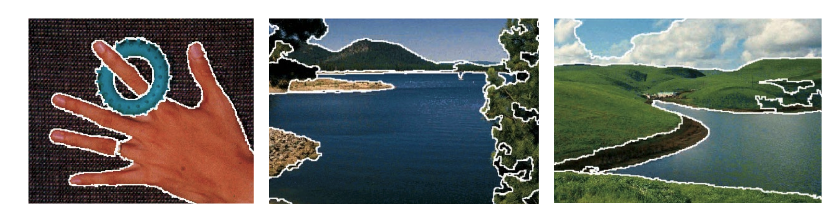

### Mean-shift segmentation art
Replace segmented region colours by their cluster means
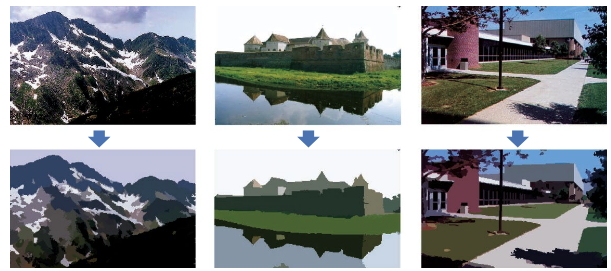

Advantages:
- Model-free (does not assume any prior shape on data clusters)
- has just a single parameter (window size)
- finds variable number of models (clusters)
- robust to outliers

Limitations:
- Computationally expensive (shifting many windows)
- output depends on window size param values
- window size (bandwidth) selection is not trivial
- does not scale well with dimensionality of feature space

## Superpixel segmentation
Superpixel-based segmentation improves efficiency
- group similar pixels into a superpixel
- superpixels together are an oversegmentation of the image
- ultimate segmentation (classification, merging) performed on superpixels
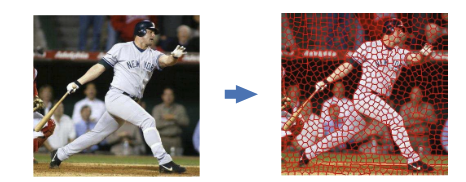

### Superpixel algorithm
Simple linear iterative clusting (SLIC)
- preserves object boundaries, fast, and memory efficient

### Simple linear iterative clusting (SLIC)
1. init cluster centeres $C_j$ on pixel grid with step size $S$.
2. Move $C_j$ to position $3 \times 3$ window with smallest gradient
3. Compute distance $D_{ij}$ for each pixel $i$ in $2S \times 2S$ window around $C_j$
4. Assign each label pixel $i$ to the cluster $C_j$ with smallest distance $D_{ij}$
5. Recompute cluster centres as mean colour and position of pixel in $C_j$
6. Iterate step 3 until the residual error (L1 dist between prev centres and recomputed centres) is samll
$$
\begin{align}
D &=
\sqrt{\frac{d^2_{lab}}{m^2}+\frac{d^2_{xy}}{S^2}} \\
&\text{(weight } m \text{ controls influence of} \\
&\text{colour over spatial difference)}
\end{align}
$$

$$
d_{lab} = \sqrt{(l_j - l_i)^2 + (a_j - a_i)^2 + (b_j - b_i) ^2 } \text{  distance in CIELAB space}
$$
$$
d_{xy} = \sqrt{(x_j-x_i)^2 + (y_j-y_i)^2} \text{  distance in pixel space}
$$

*Comparison of superpixel methods*
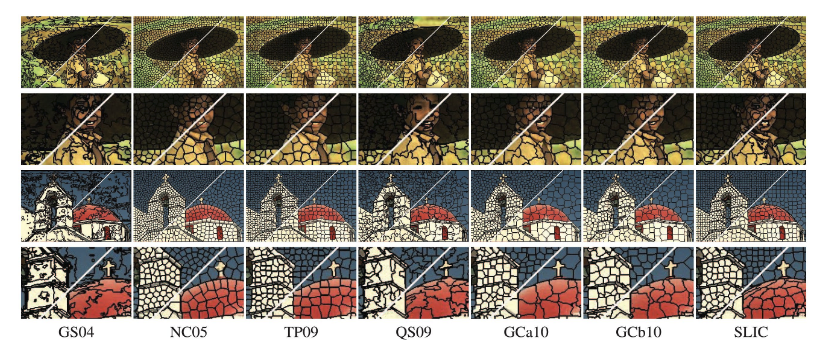

## Conditional random field
Superpixels provide a basis for further segmentation
- Determine spatial relationship between the superpixels
- compute similarities between superpixels
- group superpixels to form larger segments

Conditional random field (CRF) approach

Probabilstic graphical model that encoes the relationships between observations (i.e. superpixels) and constructs a consistent interpretation (i.e. segmentation) for a set of data (i.e. an image)

### Graph representation of superpixels
- nodes: superpixels (value based on features of superpixels)
- edges: adjacency (value based on similarity between superpixels)
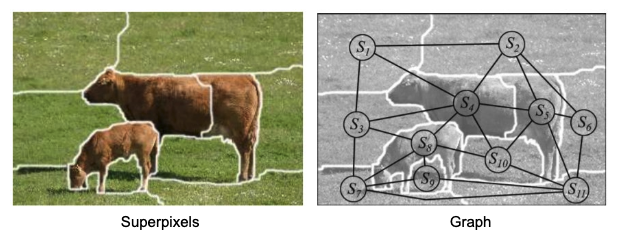

### Segmentation by graph partitioning
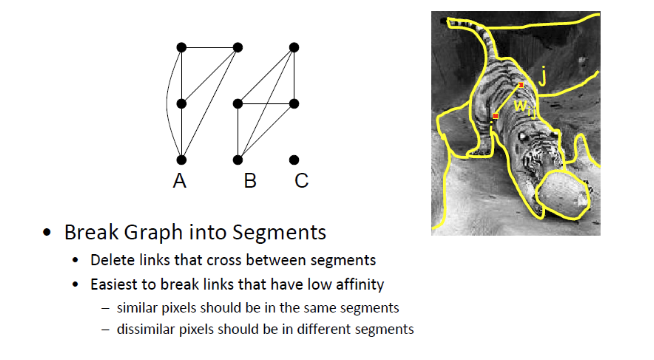

### Measuring affinity
- representing each superpixel by feature vector $x$ and define dist func appropriate for this feature representation
- we can convert the dist between two feature vectors into an affinity with the helper of generalised Gaussian kernel
$$\text{exp}(-\frac{1}{2\sigma^2}\text{dist}(x_i,x_j)^2)$$

### Graph cut
- cutting set of edges makes a graph disconnected
- Cost of cut: sum of weights of cut edges
- Graph cut gives us segmentation

### Segmentation by graph cutting
formulated as an energy minimisation problem: $E(s,c) = \sum_i \phi(s_i,c_i) + \sum_{ij} \psi(s_i, s_j)$

Unary potential $\phi$:
- data term based on graph node values
- computes cost of superpixel $s_i$ belonging to class $c_i$
- lower cost means higher likelihood of $s_i$ belonging to $c_i$
- can be obtained via superpixel classification

Pairwise potential $\psi$:
- smoothness term based on graph edge values
- computes cost of neighbourhood consistency
- cost is assigned if adjacent superpixels are assigned to different classes
- higher similarty results in a lower cost (0 if assigned to the same class)

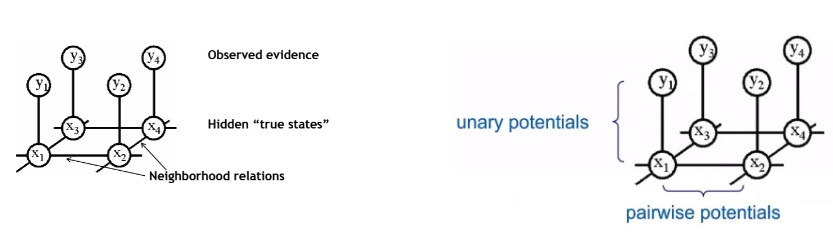

**Graph cutting by min-cut/max-flow**
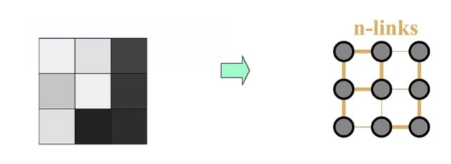
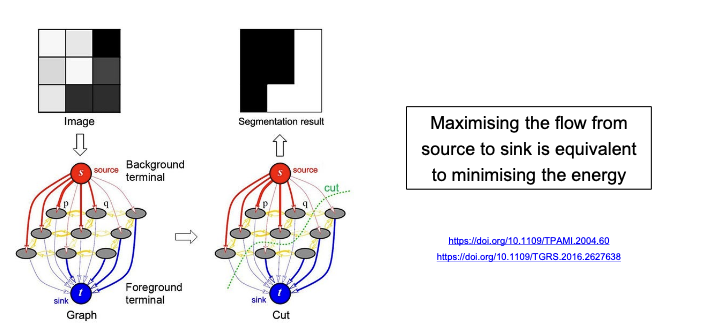

**Graph cutting using multiple soruce/sinks**
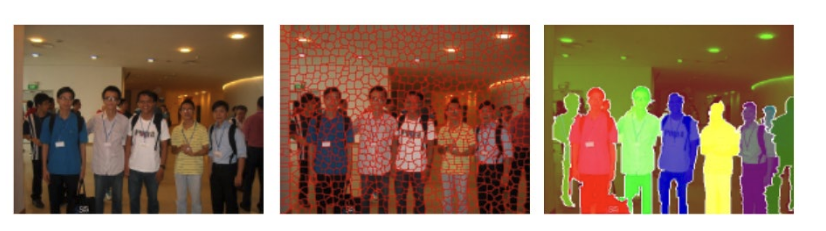

## Active contour segmentation
- contour based appraoch to object segmentation
- aims to locate object boundaries in images by curve fitting
- represents curve by set of control points and interpolation
- iteratively moves the control point to fit the curve to the object
- uses img, smoothness and user-guidance forces along curve

*Also known as the snakes method*
- smoothly follows high intensity gradients at the object boundary
- briges areas of noise or missing gradients using smooth interpolation

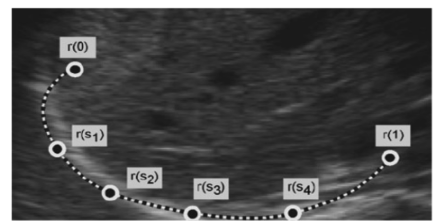

### Missing gradient problem
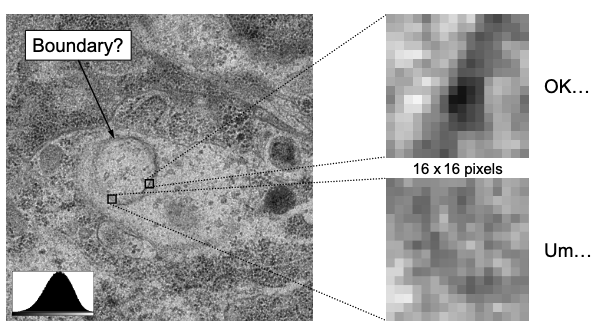

**Enforcing a solution**
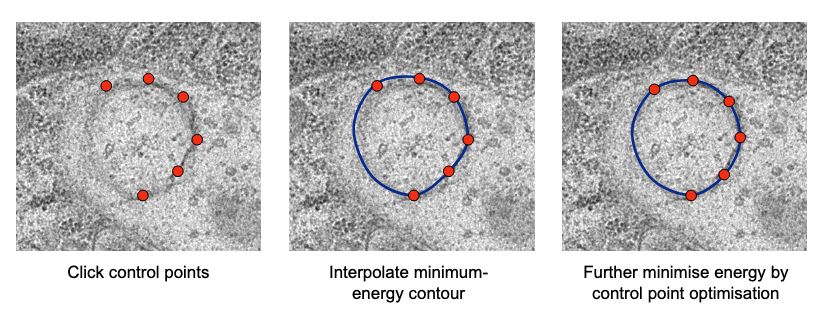

## Level-set segmentation

Active countours/ snakes are parametric models
- explicit representations of object boundaries
- typically requires manual interaction to init the curve
- challenging to change the topology of the curve as it evolves
- curve reparameterisation may be required for big shape changes
Level-set methods - more popular alternatives
- implicit representations of the object boundaries
- boundaries defined byt eh zero-set of a higher dimensional function
- level-set function evolves to make the zero-fit fit and track objects
- easily accommodates topological changes in object shape
- computationally more demanding thana active contours

### Level-set shape representation
- define inital 3D level-set function
- zero-level plaen represents 2D shape
- iteratively deform the function to fit the shape

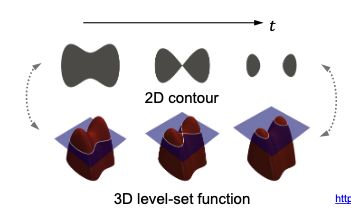

### Examples
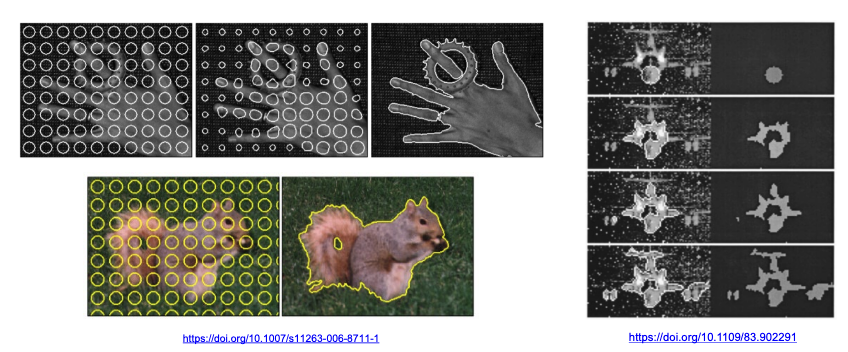

# Evaluating segmentation methods

## Classifying pixels using ground truth
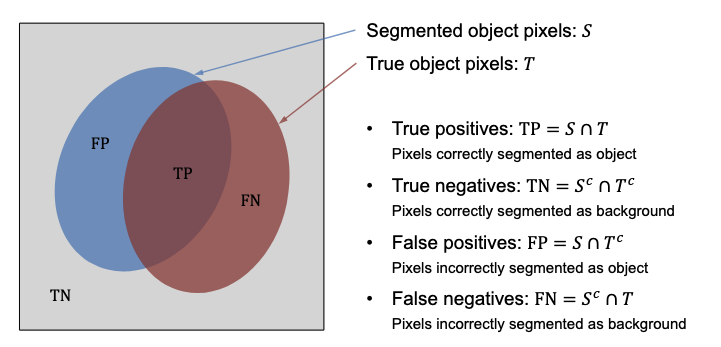

## Sensitivity and specificity
- Sensitvity (= true-positive rate)
  fraction of the true object that is correctly segmented
  $$TPR= \frac{|TP|}{|TP|+|FN|}$$
- Specificity(= true-negative rate)
  Fraction of the true background that is correctly segmented
  $$TNR = \frac{|TN|}{|TN| + |FP|}$$
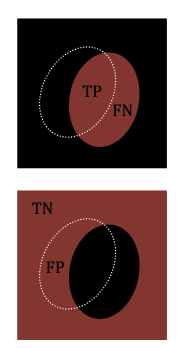

## Receiver operation characteristics (ROC)
Plot the true-positive rate (sensitivity) vs the false-positve rate of a method as a function of its free params

e.g. Thresholding
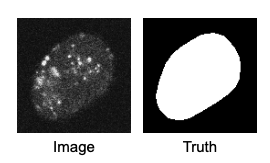
Compute the sensitivity and specificity for all possible intensity thresholds $\tau$ and plot the results

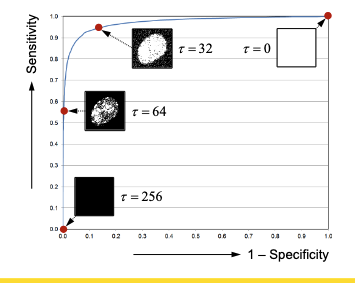

### Comparing methods by ROC analysis
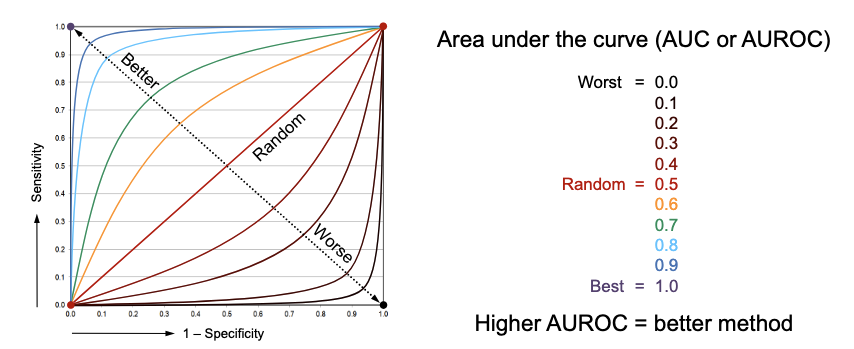

## Precision, recall, F-measure
- Precision (= positive predictive rate)
  fraction of the segmented object that is correctly segmented
  $$P= \frac{|TP|}{|TP|+|FP|}$$
- Recall (= senstivity)
  Fraction of the true object that is correctly segmented
  $$R = \frac{|TP|}{|TP| + |FN|}$$
- F-measure
  Harmonic mean of precision and recall
  $$F1 = \frac{2RP}{R+P}$$
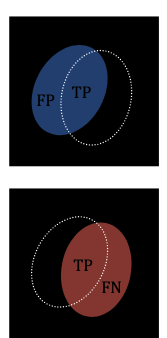

## Metric implementation
How to choose an explain measurement results

Example scenario:
"A journalist J is looking for articles on a rare topic among thousands. J can view many articles but does not want to miss any important. ML model presents a number of articles. Which metric we should apply?"
Recall is relevant here, since it measures proportion of good instances currently classified.

"An investment manager M is looking for a good stock to invest. ML model delivers recommended stocks. Which metric to apply?"
Here is better to have fewer good stocks rather than many bad. Therefore, precision.

## Recall or precision
$$
\begin{align}
F_{\beta} &=
\frac{(1+\beta^2) \times P \times R}{(\beta^2 \times P) + R} \\
&\beta = 1 \text{ : F1 score} \\
&\beta > 1 \text{ : weighted more on recall} \\
&\beta < 1 \text{ : weighted more on precision} \\
\end{align}
$$

## Jaccard and Dice similarity coefficients
- Jaccard similary coefficient (JSC, also called IoU)
  Intersection over union (IoU) = correctly segmented fraction of the union of the segmented object and the true object
  $$ JSC = \frac{|S \bigcap T|}{|S \bigcup T|} = \frac{|TP|}{|FP| + |TP|+|FN|}, 0 \leq J(A,B) \leq 1$$
- Dice similarity coefficient (DSC)
  Correctly segmented fraction of the segmented object set jointed wiht the true object set
  $$ DSC = \frac{2|S \bigcap T|}{|S|+|T|} = \frac{2|TP|}{|FP|+2|TP|+|FN|},  DSC(A,B) = \frac{2\cdot J(A,B)}{1+J(A,B)}$$